# TITANIC SURVIVAL PREDICTIONS
### Prepared by: Imen Cherif BA/IT

The Titanic dataset is one of the most famous datasets used for machine learning algorithms. Its purpose is to describe the survival status of individual passengers on the Titanic. 
111 Years after the dramatic sinking of the ship, the objective of this notebook is to predict who of the passengers survived and who could not make it. 
Some of the code lines used were inspired from this Kaggle notebook: https://www.kaggle.com/code/nadintamer/titanic-survival-predictions-beginner .

### 1. Reading and Exploring the Data:

In this example, we have 3 different datasets: train.csv, test.csv, and gender_submission.csv. 
In order to test our algorithm after conducting the right preparation and processing of our data, we need to combine the last two datasets.

In [192]:
import pandas as pd
test_df = pd.read_csv("test.csv")
gender_df = pd.read_csv("gender_submission.csv")
merged_df = pd.merge(test_df, gender_df, on="PassengerId")
merged_df.to_csv("merged.csv", index=False)

In [193]:
train = pd.read_csv("train.csv")
test = pd.read_csv("merged.csv")

train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### 2. Data Analysis:

In [194]:
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [195]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
784,785,0,3,"Ali, Mr. William",male,25.0,0,0,SOTON/O.Q. 3101312,7.0500,NaN,S
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
268,269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.0,0,1,PC 17582,153.4625,C125,S
136,137,1,1,"Newsom, Miss. Helen Monypeny",female,19.0,0,2,11752,26.2833,D47,S
259,260,1,2,"Parrish, Mrs. (Lutie Davis)",female,50.0,0,1,230433,26.0000,NaN,S


In [196]:
print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


This last chunk of code shows us that we have missing values in the "Age", "Cabin", and "Embarked" columns. We need to make some transformations to these missing values before applying any machine learning algorithm. 

### 3. Data Cleaning:

In [197]:
test.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418,418.000000
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3,NaN
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S,NaN
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270,NaN
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN,0.363636
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN,0.481622
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,0.000000
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,0.000000
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN,1.000000


It is clear that the "Cabin" and "Ticket" features will not serve the prediction algorithm. Therefore, we can start by removing them from both the training and testing sets.

In [198]:
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

In [199]:
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

Now, we need to see where most passengers embarked from in order to know how to fill the missing values. 

In [200]:
print("Number of people embarking in Southampton (S):")
southampton = train[train["Embarked"] == "S"].shape[0]
print(southampton)

print("Number of people embarking in Cherbourg (C):")
cherbourg = train[train["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Number of people embarking in Queenstown (Q):")
queenstown = train[train["Embarked"] == "Q"].shape[0]
print(queenstown)

Number of people embarking in Southampton (S):
644
Number of people embarking in Cherbourg (C):
168
Number of people embarking in Queenstown (Q):
77


We can clearly see that the majority of people embarked in Southampton (S), so we can fill in the missing values with S.

In [201]:
train = train.fillna({"Embarked": "S"})

Now, we can tackle the missing values in the "Age" feature. However, since a higher percentage of values are missing, we cannot apply the same approach used earlier with the "Embarked" feature and fill them all with the same value. We can start by extracting the different titles of the passengers.

In [202]:
#create a combined group of both datasets
combine = [train, test]

#extract a title for each Name in the train and test datasets
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


Now, we need to summarize the different titles into clear and well defined ones.

In [203]:
#replace various titles with more common names
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


After that, we need to map the different title groups into numerical values.

In [204]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


After that,we proceed to creating different age groups in order to categorize the passengers according to their ages.

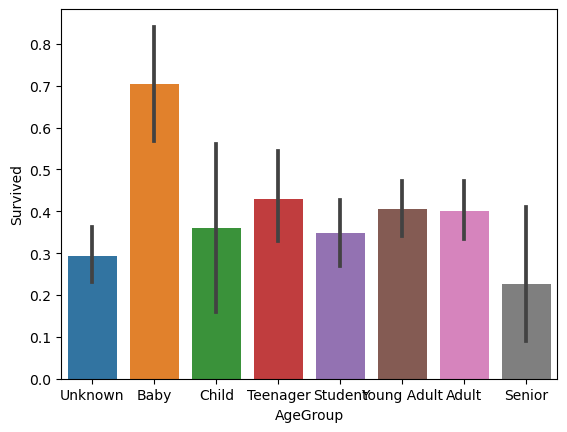

In [205]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#sort the ages into logical categories
train["Age"] = train["Age"].fillna(-0.5)
test["Age"] = test["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)

#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=train)
plt.show()

After that, we fill the missing ages with the mode of each age group for each title.

In [206]:
mr_age = train[train["Title"] == 1]["AgeGroup"].mode() #Young Adult
miss_age = train[train["Title"] == 2]["AgeGroup"].mode() #Student
mrs_age = train[train["Title"] == 3]["AgeGroup"].mode() #Adult
master_age = train[train["Title"] == 4]["AgeGroup"].mode() #Baby
royal_age = train[train["Title"] == 5]["AgeGroup"].mode() #Adult
rare_age = train[train["Title"] == 6]["AgeGroup"].mode() #Adult

age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}
for x in range(len(train["AgeGroup"])):
    if train["AgeGroup"][x] == "Unknown":
        train["AgeGroup"][x] = age_title_mapping[train["Title"][x]]
        
for x in range(len(test["AgeGroup"])):
    if test["AgeGroup"][x] == "Unknown":
        test["AgeGroup"][x] = age_title_mapping[test["Title"][x]]

Now, we map each age group value to a numerical value that we will use later. After that, we can remove the age column since we will be using the age group in the prediction, for it is more practical.

In [207]:
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

train = train.drop(['Age'], axis = 1)
test = test.drop(['Age'], axis = 1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked,Title,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,7.2500,S,1,4.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,71.2833,C,3,6.0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,7.9250,S,2,5.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,53.1000,S,3,5.0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,8.0500,S,1,5.0


Now, we can also drop the "Name" feature since it will not serve our analysis.

In [208]:
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

And now, we map the sex and embarked values to numerical values:

In [209]:
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,AgeGroup
0,1,0,3,0,1,0,7.2500,S,1,4.0
1,2,1,1,1,1,0,71.2833,C,3,6.0
2,3,1,3,1,0,0,7.9250,S,2,5.0
3,4,1,1,1,1,0,53.1000,S,3,5.0
4,5,0,3,0,0,0,8.0500,S,1,5.0


In [210]:
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,AgeGroup
0,1,0,3,0,1,0,7.2500,1,1,4.0
1,2,1,1,1,1,0,71.2833,2,3,6.0
2,3,1,3,1,0,0,7.9250,1,2,5.0
3,4,1,1,1,1,0,53.1000,1,3,5.0
4,5,0,3,0,0,0,8.0500,1,1,5.0


Right after, we fill in missing Fare value in the test set according to the mean fare for that Pclass and map the Fare values into groups of numerical values before dropping the "Fare" feature.

In [212]:
for x in range(len(test["Fare"])):
    if pd.isnull(test["Fare"][x]):
        pclass = test["Pclass"][x] #Pclass = 3
        test["Fare"][x] = round(train[train["Pclass"] == pclass]["Fare"].mean(), 4)

train['FareBand'] = pd.qcut(train['Fare'], 4, labels = [1, 2, 3, 4])
test['FareBand'] = pd.qcut(test['Fare'], 4, labels = [1, 2, 3, 4])

In [213]:
train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)

After cleaning the data, we can now see the training and test sets in order to have a clear overview about the data.

In [214]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,AgeGroup,FareBand
0,1,0,3,0,1,0,1,1,4.0,1
1,2,1,1,1,1,0,2,3,6.0,4
2,3,1,3,1,0,0,1,2,5.0,2
3,4,1,1,1,1,0,1,3,5.0,4
4,5,0,3,0,0,0,1,1,5.0,2


In [215]:
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,Survived,Title,AgeGroup,FareBand
0,892,3,0,0,0,3,0,1,5.0,1
1,893,3,1,1,0,1,1,3,6.0,1
2,894,2,0,0,0,3,0,1,7.0,2
3,895,3,0,0,0,1,0,1,5.0,2
4,896,3,1,1,1,1,1,3,4.0,2


### 4. Decision Tree Algorithm:

We start by dividing the training and test sets into a target and features:

In [216]:
X_train = train.drop('Survived', axis=1)
y_train = train['Survived']
X_test = test.drop('Survived', axis=1)
y_test = test['Survived']

In [217]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.5750002796170365, 0.9761904761904762, 'X[6] <= 1.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(0.30627292859699357, 0.9285714285714286, 'X[1] <= 1.5\ngini = 0.264\nsamples = 517\nvalue = [436, 81]'),
 Text(0.1220472440944882, 0.8809523809523809, 'X[0] <= 565.5\ngini = 0.452\nsamples = 107\nvalue = [70, 37]'),
 Text(0.05082319255547602, 0.8333333333333334, 'X[7] <= 6.5\ngini = 0.382\nsamples = 70\nvalue = [52, 18]'),
 Text(0.04509663564781675, 0.7857142857142857, 'X[0] <= 187.0\ngini = 0.416\nsamples = 61\nvalue = [43, 18]'),
 Text(0.02290622763063708, 0.7380952380952381, 'X[0] <= 100.5\ngini = 0.245\nsamples = 21\nvalue = [18, 3]'),
 Text(0.01717967072297781, 0.6904761904761905, 'X[3] <= 0.5\ngini = 0.397\nsamples = 11\nvalue = [8, 3]'),
 Text(0.01145311381531854, 0.6428571428571429, 'X[8] <= 3.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.00572655690765927, 0.5952380952380952, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.01717967072297781, 0.595238

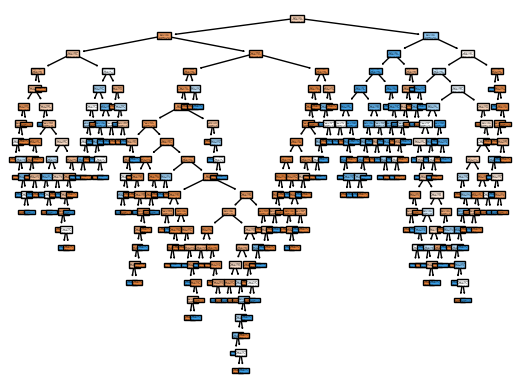

In [218]:
from sklearn import tree
tree.plot_tree(clf, filled=True)

Now, after training the model, we can finally test it!

In [220]:
y_pred = clf.predict(X_test)

In [221]:
from sklearn.metrics import accuracy_score

In [222]:
clf.score(X_test, y_test)

0.7631578947368421

The accuracy score of the model is 76.32% which is a score that can probably be improved.

In [223]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred) 
cm

array([[196,  70],
       [ 29, 123]], dtype=int64)

We can see that this algorithm give us 319 true values between the 196 true positives and the 123 trus negatives.
However, we have 70 false positives and 29 false negatives. 
This means that 70 passengers were predicted to have survived when they did not make it, while 29 were said to be not to have made it when they actually survived. 
All in all, this model shows us that 225 passengers survived the sinking of the ship, while 193 did not.

In the next chunks, we try to fix one hyperparameter at a time: the maximum depth at first, the the minimum samples leaves. <br>
We then check the accuracy score for each of them before displaying the trees.

In [224]:
clf1 = tree.DecisionTreeClassifier(max_depth =5)
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)
clf1.score(X_test, y_test)

0.6794258373205742

[Text(0.5117924528301887, 0.9166666666666666, 'X[6] <= 1.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(0.24056603773584906, 0.75, 'X[1] <= 1.5\ngini = 0.264\nsamples = 517\nvalue = [436, 81]'),
 Text(0.10377358490566038, 0.5833333333333334, 'X[0] <= 565.5\ngini = 0.452\nsamples = 107\nvalue = [70, 37]'),
 Text(0.05660377358490566, 0.4166666666666667, 'X[7] <= 6.5\ngini = 0.382\nsamples = 70\nvalue = [52, 18]'),
 Text(0.03773584905660377, 0.25, 'X[0] <= 187.0\ngini = 0.416\nsamples = 61\nvalue = [43, 18]'),
 Text(0.018867924528301886, 0.08333333333333333, 'gini = 0.245\nsamples = 21\nvalue = [18, 3]'),
 Text(0.05660377358490566, 0.08333333333333333, 'gini = 0.469\nsamples = 40\nvalue = [25, 15]'),
 Text(0.07547169811320754, 0.25, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.1509433962264151, 0.4166666666666667, 'X[0] <= 741.5\ngini = 0.5\nsamples = 37\nvalue = [18, 19]'),
 Text(0.11320754716981132, 0.25, 'X[0] <= 676.0\ngini = 0.461\nsamples = 25\nvalue = [9, 16]'),

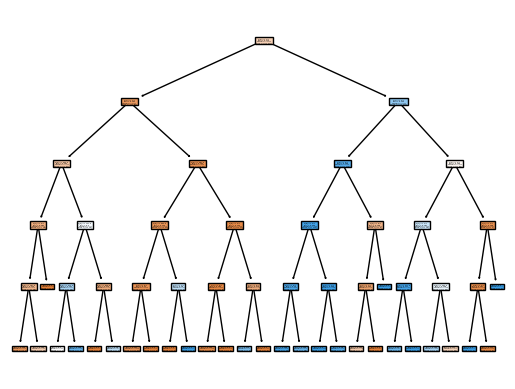

In [225]:
tree.plot_tree(clf1, filled=True)

In [226]:
clf2 = tree.DecisionTreeClassifier(min_samples_leaf = 30)
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)
clf2.score(X_test, y_test)

0.7583732057416268

[Text(0.48, 0.9375, 'X[6] <= 1.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(0.22, 0.8125, 'X[1] <= 1.5\ngini = 0.264\nsamples = 517\nvalue = [436, 81]'),
 Text(0.12, 0.6875, 'X[0] <= 565.5\ngini = 0.452\nsamples = 107\nvalue = [70, 37]'),
 Text(0.08, 0.5625, 'X[0] <= 346.0\ngini = 0.382\nsamples = 70\nvalue = [52, 18]'),
 Text(0.04, 0.4375, 'gini = 0.32\nsamples = 40\nvalue = [32, 8]'),
 Text(0.12, 0.4375, 'gini = 0.444\nsamples = 30\nvalue = [20, 10]'),
 Text(0.16, 0.5625, 'gini = 0.5\nsamples = 37\nvalue = [18, 19]'),
 Text(0.32, 0.6875, 'X[0] <= 581.5\ngini = 0.192\nsamples = 410\nvalue = [366, 44]'),
 Text(0.24, 0.5625, 'X[0] <= 509.5\ngini = 0.225\nsamples = 256\nvalue = [223, 33]'),
 Text(0.2, 0.4375, 'X[3] <= 0.5\ngini = 0.199\nsamples = 223\nvalue = [198, 25]'),
 Text(0.16, 0.3125, 'X[8] <= 1.5\ngini = 0.225\nsamples = 178\nvalue = [155, 23]'),
 Text(0.08, 0.1875, 'X[0] <= 275.0\ngini = 0.156\nsamples = 82\nvalue = [75, 7]'),
 Text(0.04, 0.0625, 'gini = 0.219\nsa

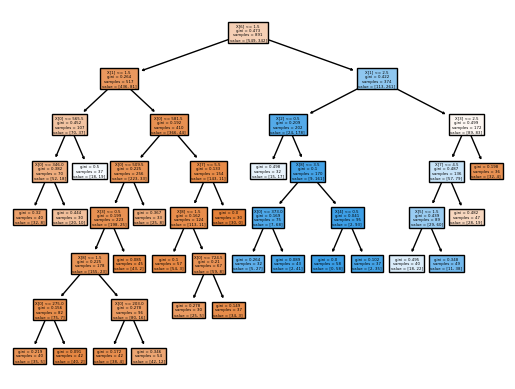

In [227]:
tree.plot_tree(clf2, filled=True)

For both of these examples, the accuracy score does not get higher, so the best model until now is the first one. <br>
However, we cannot draw any conclusion from this observation. <br>
Therefore, we now need to perform hyperparameter tuning using GridSearchCV.

In [228]:
from sklearn.model_selection import GridSearchCV
# Define the decision tree classifier
dt = DecisionTreeClassifier()

# Define the hyperparameters to tune
params = {'max_depth': [1, 2, 3, 4, 5, 6, 7],
          'min_samples_split': [2, 3, 5, 10, 15, 20],
          'min_samples_leaf': [1, 2, 4,5,6],
          'criterion': ['gini', 'entropy']}

# Perform a grid search over the hyperparameters
grid = GridSearchCV(dt, params, cv=5)
grid.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy score
print("Best hyperparameters:", grid.best_params_)
print("Best accuracy score:", grid.best_score_)

# Evaluate the model on the test set using the best hyperparameters
best_dt = grid.best_estimator_
y_pred = best_dt.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", acc)

Best hyperparameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best accuracy score: 0.8248948590797817
Accuracy on test set: 0.8277511961722488


Now, we found that the best model according to the previous chunk is obtained for a maximum depth equal to 3, a minimum samples leaf of 1 and a minimum samples split of 2. The criterion used to draw this conclusion is the gini score. <br>
Therefore, the best model we have for is 82.77% accurate.

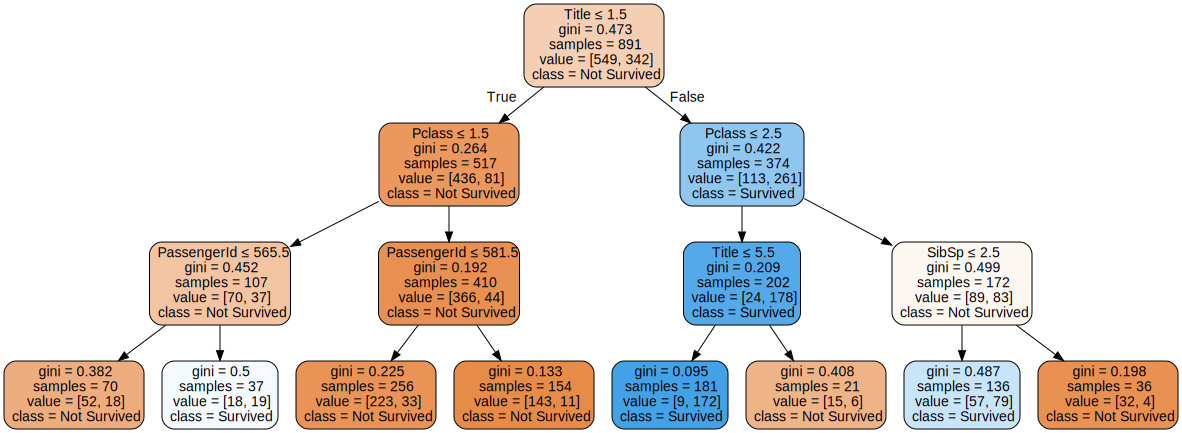

In [229]:
from sklearn.tree import export_graphviz
import graphviz

# Export the decision tree as a DOT file
dot_data = export_graphviz(best_dt, out_file=None, 
                           feature_names=X_test.columns, 
                           class_names=["Not Survived", "Survived"], 
                           filled=True, rounded=True, 
                           special_characters=True)

# Visualize the decision tree using Graphviz
graph = graphviz.Source(dot_data)
graph

We can now clearly see that according to the best model we have, and in order to predict the survival state of each passenger, we start by checking their titles. This first divides them into "Mr" title holders and the others. Right after, we check the Pclass as the class the passenger is plays an important role in predicting whether they will survive or not. <br>
At the end, we can see for example that the passengers holding the "Mr" title with an id less than 565.5 did not survive. 

In [230]:
cm = confusion_matrix(y_test, y_pred) 
cm

array([[198,  68],
       [  4, 148]], dtype=int64)

Clearly, we can see that this model gives us a much better performance and accuracy. In fact, we only have 72 wrong predictions and 346 true ones.

## Conclusion: 
We can see that the best feature that would help us predict the survival status of the passengers is their title. Further explanation can be found in the last tree inserted above.